In [7]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!wget https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!dpkg -i google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
!apt-get install -f
!apt-get -y install -qq fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
--2018-10-16 19:48:17--  https://launchpad.net/~alessandro-strada/+archive/ubuntu/google-drive-ocamlfuse-beta/+build/15331130/+files/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpad.net (launchpad.net)... 91.189.89.223, 91.189.89.222
Connecting to launchpad.net (launchpad.net)|91.189.89.223|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://launchpadlibrarian.net/386846978/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb [following]
--2018-10-16 19:48:18--  https://launchpadlibrarian.net/386846978/google-drive-ocamlfuse_0.7.0-0ubuntu1_amd64.deb
Resolving launchpadlibrarian.net (launchpadlibrarian.net)... 91.189.89.229, 91.189.89.228
Connecting to launchpadlibrarian.net (launchpadlibrarian.net)|91.189.89.229|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232624 (1.2M) [application/x-debian-package]
Saving to: ‘google-drive-ocamlfuse_

In [8]:
!mkdir -p My Drive
!google-drive-ocamlfuse My Drive 

!ls My Drive/Datasets/Otto_Classification

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option
Drive/Datasets/Otto_Classification:
test.csv  train.csv

My:


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
dataset_train = pd.read_csv('Drive/Datasets/Otto_Classification/train.csv')

In [0]:
dataset_test = pd.read_csv('Drive/Datasets/Otto_Classification/test.csv')

In [12]:
dataset_train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [13]:
dataset_train.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.000000,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,30939.500000,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,...,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,17862.784315,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,...,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15470.250000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30939.500000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,46408.750000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,61878.000000,61.00000,51.000000,64.000000,70.000000,19.000000,10.000000,38.000000,76.000000,43.000000,...,76.000000,55.000000,65.000000,67.000000,30.000000,61.000000,130.000000,52.000000,19.000000,87.000000


In [14]:
dataset_test.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,0,11,1,20,0,0,0,0,0
1,2,2,2,14,16,0,0,0,0,0,...,0,0,0,0,0,4,0,0,2,0
2,3,0,1,12,1,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,0,0,0,0,0
4,5,1,0,0,1,0,0,1,2,0,...,0,0,0,0,0,0,0,9,0,0


In [15]:
dataset_test.describe()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,...,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000,144368.000000
mean,72184.500000,0.386201,0.263597,0.899819,0.780727,0.071498,0.026439,0.200169,0.667378,1.035271,...,0.074989,0.538485,1.128782,0.405249,0.875526,0.473284,0.814010,0.271161,0.388348,0.132675
std,41675.596169,1.468882,1.261908,2.949106,2.846181,0.428568,0.228354,1.069235,2.286832,3.548618,...,1.288595,1.906121,2.682511,1.631566,2.090288,1.617853,4.603653,2.073627,1.006935,1.302695
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36092.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,72184.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,108276.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,144368.000000,64.000000,45.000000,84.000000,82.000000,14.000000,11.000000,44.000000,100.000000,47.000000,...,132.000000,56.000000,73.000000,54.000000,37.000000,62.000000,119.000000,74.000000,22.000000,91.000000


In [16]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 95 columns):
id         61878 non-null int64
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null i

In [17]:
dataset_train['target'].unique()

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [18]:
dataset_train['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [19]:
#checking the null values
dataset_train.isnull().sum().sort_values(ascending=False)

target     0
feat_34    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
feat_30    0
feat_31    0
feat_32    0
feat_33    0
feat_35    0
feat_23    0
feat_36    0
feat_37    0
feat_38    0
feat_39    0
feat_40    0
feat_41    0
feat_42    0
feat_43    0
feat_44    0
feat_24    0
feat_22    0
feat_46    0
feat_10    0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_92    0
feat_72    0
feat_70    0
feat_48    0
feat_58    0
feat_49    0
feat_50    0
feat_51    0
feat_52    0
feat_53    0
feat_54    0
feat_55    0
feat_56    0
feat_57    0
feat_59    0
feat_69    0
feat_60    0
feat_61    0
feat_62    0
feat_63    0
feat_64    0
feat_65    0
feat_66    0
feat_67    0
feat_68    0
id         0
Length: 95, dtype: int64

In [20]:
dataset_test.isnull().sum().sort_values(ascending=False)

feat_93    0
feat_34    0
feat_25    0
feat_26    0
feat_27    0
feat_28    0
feat_29    0
feat_30    0
feat_31    0
feat_32    0
feat_33    0
feat_35    0
feat_23    0
feat_36    0
feat_37    0
feat_38    0
feat_39    0
feat_40    0
feat_41    0
feat_42    0
feat_43    0
feat_44    0
feat_24    0
feat_22    0
feat_92    0
feat_10    0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_86    0
feat_87    0
feat_88    0
feat_89    0
feat_90    0
feat_91    0
feat_71    0
feat_70    0
feat_69    0
feat_68    0
feat_49    0
feat_50    0
feat_51    0
feat_52    0
feat_53    0
feat_54    0
feat_55    0
feat_56    0
feat_57    0
feat_58    0
feat_59    0
feat_60    0
feat_61    0
feat_62    0
feat_63    0
feat_64    0
feat_65    0
feat_66    0
feat_67    0
id         0
Length: 94, dtype: int64

We can see that there are no missing values in both training and testing dataset

In [21]:
dataset_train.corr()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
id,1.000000,0.070691,0.185463,0.138980,1.460200e-01,0.030707,0.033410,0.136501,0.197418,-0.156082,...,-0.008192,-0.084507,-0.096484,0.097087,-0.215878,0.111519,0.188895,0.139078,0.131737,0.047944
feat_1,0.070691,1.000000,0.031332,-0.027807,-2.752941e-02,0.042973,0.043603,0.298952,0.056321,-0.032285,...,0.049634,-0.008739,0.107947,0.089374,0.020830,0.096851,0.010310,0.037264,0.054777,0.081783
feat_2,0.185463,0.031332,1.000000,0.082573,1.349870e-01,0.020926,0.041343,0.222386,0.019815,-0.025630,...,0.009845,-0.006764,-0.039090,0.047451,-0.047035,0.105527,0.515022,0.026383,-0.008219,0.054593
feat_3,0.138980,-0.027807,0.082573,1.000000,5.835232e-01,0.010880,0.004288,0.001294,-0.053462,-0.063551,...,0.011159,-0.048626,-0.096093,-0.009838,-0.082336,0.174781,-0.015068,-0.012417,0.066921,0.006814
feat_4,0.146020,-0.027529,0.134987,0.583523,1.000000e+00,0.017290,0.014059,0.014490,-0.046184,-0.046250,...,0.005684,-0.033153,-0.071029,0.005055,-0.067484,0.183715,0.009454,-0.010312,0.087631,0.015746
feat_5,0.030707,0.042973,0.020926,0.010880,1.729026e-02,1.000000,0.145355,0.075047,0.035861,-0.024708,...,0.467329,0.034062,0.013879,0.013999,-0.019201,0.119951,0.004842,0.012012,0.065331,0.002038
feat_6,0.033410,0.043603,0.041343,0.004288,1.405895e-02,0.145355,1.000000,0.088014,0.012867,-0.009373,...,0.177777,0.004290,0.010455,0.015256,-0.015437,0.035042,0.054034,0.012465,0.015479,0.008521
feat_7,0.136501,0.298952,0.222386,0.001294,1.448981e-02,0.075047,0.088014,1.000000,0.038121,-0.027146,...,0.062634,0.037874,-0.009169,0.089574,-0.033646,0.063511,0.129578,0.068506,-0.032261,0.034912
feat_8,0.197418,0.056321,0.019815,-0.053462,-4.618407e-02,0.035861,0.012867,0.038121,1.000000,-0.039281,...,0.005064,-0.003416,-0.029395,0.059929,-0.050931,0.007974,0.026807,0.095990,0.013608,0.005131
feat_9,-0.156082,-0.032285,-0.025630,-0.063551,-4.624977e-02,-0.024708,-0.009373,-0.027146,-0.039281,1.000000,...,-0.013569,-0.031462,-0.019144,-0.016925,0.001160,-0.019147,-0.020698,-0.014742,-0.069707,-0.006038


In [0]:
target_dict = {'Class_1': 1,
               'Class_2': 2,
               'Class_3': 3,
               'Class_4': 4,
               'Class_5': 5,
               'Class_6': 6,
               'Class_7': 7,
               'Class_8': 8,
               'Class_9': 9}
dataset_train['target']= dataset_train['target'].apply(lambda x: target_dict[x])

In [23]:
dataset_train.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


We can see that the target values changed into numbers.

In [24]:
X = dataset_train.iloc[:, :-1].values
X

array([[    1,     1,     0, ...,     0,     0,     0],
       [    2,     0,     0, ...,     0,     0,     0],
       [    3,     0,     0, ...,     0,     0,     0],
       ...,
       [61876,     0,     0, ...,     0,     0,     0],
       [61877,     1,     0, ...,     3,    10,     0],
       [61878,     0,     0, ...,     0,     2,     0]])

In [25]:
y = dataset_train.iloc[:, -1:].values
y

array([[1],
       [1],
       [1],
       ...,
       [9],
       [9],
       [9]])

In [26]:
y.shape

(61878, 1)

In [0]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [0]:
X_test = dataset_test.iloc[:,:].values

In [29]:
#feature normalisation
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x = sc_x.fit(X_train)
X_train = sc_x.transform(X_train)
X_val = sc_x.transform(X_val)
X_test = sc_x.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [0]:
y_train = y_train.ravel()

In [31]:
y_train.shape

(46408,)

## **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)
y_pred_LR_val = classifier_LR.predict(X_val)

In [31]:
#Accuracy of Logistic Regression in training set
accuracy_classifier_LR = round(classifier_LR.score(X_train,y_train)*100, 2)
accuracy_classifier_LR

89.86

We can see that the training set accuracy is about around 89.9%

#### **Evaluation**

In [32]:
#1. Validation score
from sklearn.metrics import accuracy_score
val_acc_LR = accuracy_score(y_val, y_pred_LR_val)
print(val_acc_LR)

0.8899806076276664


We can see that the validation accuracy is about 88.9%

In [33]:
#2. Confusion matrix
from sklearn.metrics import confusion_matrix
cm_LR = confusion_matrix(y_val, y_pred_LR_val)
print(cm_LR)

[[ 357   96    0    0    0    7    0    0    0]
 [   2 3901   87    1    4    7    3    0    0]
 [   0  357 1509   32    2   22   24    1    0]
 [   0    7  352  290    6   45   10    0    0]
 [   0    0   18    0  642    4    0    1    0]
 [   0    0   51   10    0 3346   48   54    8]
 [   0    0  118   18    4   63  479   53    2]
 [   0    0   23    1    2   43   37 1987   18]
 [   0    0    0    1    0   11    2   47 1257]]


In [34]:
from sklearn.metrics import classification_report
cr_LR = classification_report(y_val, y_pred_LR_val)
print(cr_LR)

             precision    recall  f1-score   support

          1       0.99      0.78      0.87       460
          2       0.89      0.97      0.93      4005
          3       0.70      0.78      0.74      1947
          4       0.82      0.41      0.55       710
          5       0.97      0.97      0.97       665
          6       0.94      0.95      0.95      3517
          7       0.79      0.65      0.71       737
          8       0.93      0.94      0.93      2111
          9       0.98      0.95      0.97      1318

avg / total       0.89      0.89      0.89     15470



We can see from the aove that the precision and recall is about 0.89 and f1 score is also 0.89 which is encouraging.

#### **cross validation**

In [35]:
from sklearn.model_selection import cross_val_score
cv_LR = cross_val_score(estimator=classifier_LR, X=X_train,
                            y=y_train.ravel(), scoring='accuracy', cv=5)
print('best_accuracy:%4f' %cv_LR.mean())
print('best_std:%4f' %cv_LR.std())

best_accuracy:0.894285
best_std:0.001880


We can see that the Cross validation accuracy is also about 89% and it looks good.

## **KNN**

In [0]:
#Using an elbow method to find the neighbours
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

for i in range(1, 20):
  classifier_KNN = KNeighborsClassifier(n_neighbors = i)
  classifier_KNN.fit(X_train, y_train)
  y_pred_val = classifier_KNN.predict(X_val)
  error_rate.append(np.mean(y_pred_val != y_val))

Text(0,0.5,'Error_Rate')

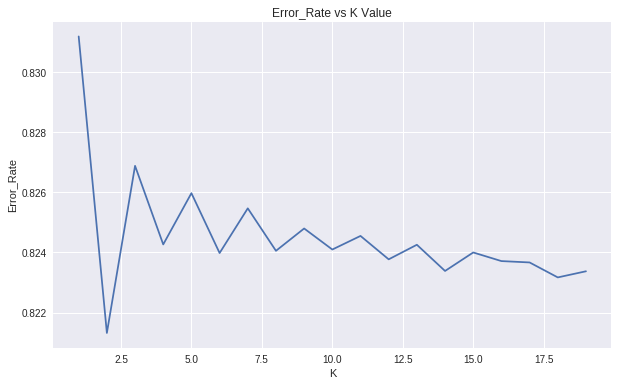

In [29]:
#visualizing
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate)
plt.title('Error_Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error_Rate')

We can see that the K>15 the error is around 0.824 and 0.823. So we put K=15

In [0]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors=15)
classifier_KNN.fit(X_train, y_train)
y_pred_KNN_val = classifier_KNN.predict(X_val)

In [38]:
#training accuracy
print(round(classifier_KNN.score(X_train, y_train)*100,2))

85.82


We can see that the training accuracy is about 85.82

#### **Evaluation of KNN**

In [0]:
#1. Accuracy of KNN
from sklearn.metrics import accuracy_score
val_acc_KNN = accuracy_score(y_val, y_pred_KNN_val)

In [40]:
print(val_acc_KNN)

0.833354880413704


We can see that the validation accuracy is about 83.3%

In [41]:
#2. Confusion matrix
from sklearn.metrics import confusion_matrix
cm_KNN = confusion_matrix(y_val, y_pred_KNN_val)
cm_KNN

array([[ 340,   53,    3,    1,    0,   17,    1,   16,   29],
       [   1, 3637,  333,   15,    5,    3,    9,    1,    1],
       [   0,  707, 1182,   33,    0,    5,   15,    4,    1],
       [   0,  202,  274,  204,    6,   15,    6,    2,    1],
       [   0,    7,    9,    0,  646,    1,    0,    1,    1],
       [   7,   14,   25,   16,   10, 3263,   66,   69,   47],
       [   2,   16,   60,    7,    5,   49,  516,   71,   11],
       [   2,    7,   16,    0,    4,   86,   40, 1917,   39],
       [   3,    2,    0,    2,    1,   38,   11,   74, 1187]])

In [42]:
from sklearn.metrics import classification_report
cr_KNN = classification_report(y_val, y_pred_KNN_val)
print(cr_KNN)

             precision    recall  f1-score   support

          1       0.96      0.74      0.83       460
          2       0.78      0.91      0.84      4005
          3       0.62      0.61      0.61      1947
          4       0.73      0.29      0.41       710
          5       0.95      0.97      0.96       665
          6       0.94      0.93      0.93      3517
          7       0.78      0.70      0.74       737
          8       0.89      0.91      0.90      2111
          9       0.90      0.90      0.90      1318

avg / total       0.83      0.83      0.83     15470



We can see that the precision and recall are equal and f1score is also 0.83

#### **cross validation**

In [62]:
from sklearn.model_selection import cross_val_score
cv_KNN = cross_val_score(estimator=classifier_KNN, X=X_train, y=y_train, scoring='accuracy', cv=5)
print('best accuracy:%4f' %cv_KNN.mean())
print('best_std:%4f' %cv_KNN.std())


best accuracy:0.832075
best_std:0.005026


We can see that the cross validation is also give the accuracy of 83.2%

## **Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)
y_pred_NB_val = classifier_NB.predict(X_val)

In [44]:
#training_accuracy
print(round(classifier_NB.score(X_train, y_train)*100, 2))

80.59


We can see that the training accuracy is about 80.6%

#### **Evaluation**

In [45]:
#1. validation accuracy
val_acc_NB = accuracy_score(y_val, y_pred_NB_val)
print(val_acc_NB)

0.803425985778927


The validation accuracy is about 80.3%

In [46]:
#2. Confusion matrix
cm_NB = confusion_matrix(y_val, y_pred_NB_val)
print(cm_NB)

[[ 359   94    0    0    0    5    0    2    0]
 [   7 3687  271    0    0   27    0   13    0]
 [   0  969  783  132   34   24    0    5    0]
 [   0   46   22  566   66    7    2    1    0]
 [   0   22    7    6  626    4    0    0    0]
 [   0   99   28   27   23 3172   60   79   29]
 [   0  157    3    0    0   44  515   15    3]
 [   0   44    0    0    0  109  134 1475  349]
 [   0    4    1    0    0   29    1   37 1246]]


In [47]:
#classification report
cr_NB = classification_report(y_val, y_pred_NB_val)
print(cr_NB)

             precision    recall  f1-score   support

          1       0.98      0.78      0.87       460
          2       0.72      0.92      0.81      4005
          3       0.70      0.40      0.51      1947
          4       0.77      0.80      0.79       710
          5       0.84      0.94      0.89       665
          6       0.93      0.90      0.91      3517
          7       0.72      0.70      0.71       737
          8       0.91      0.70      0.79      2111
          9       0.77      0.95      0.85      1318

avg / total       0.81      0.80      0.80     15470



The precision and accuracy here is almost similar and the f1 score is also around 0.80

#### **cross validation**

In [48]:
cv_NB = cross_val_score(estimator=classifier_NB, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('best accuracy: %4f' %cv_NB.mean())
print('best std: %4f' %cv_NB.std())

best accuracy: 0.804429
best std: 0.007360


We can see that the cross validation also gives the 80% accuracy

## **Support Vector Machines**

In [0]:
from sklearn.svm import SVC
classifier_SVC = SVC()
classifier_SVC.fit(X_train, y_train)
y_pred_SVC_val = classifier_SVC.predict(X_val)

In [51]:
#training accuracy
print(round(classifier_SVC.score(X_train, y_train)*100, 2))

96.71


We got the training accuracy of 96.71%

#### **Evaluation**

In [64]:
#1. validation accuracy
val_acc_SVC = accuracy_score(y_val, y_pred_SVC_val)
print(val_acc_SVC)

0.9458952811893988


It gives the validation accuracy of 94.5% and it looks good

In [65]:
#2. confusion matrix
cm_NB = confusion_matrix(y_val, y_pred_SVC_val)
print(cm_NB)

[[ 415   17    0    0    0    4    0   22    2]
 [   2 3893  103    1    0    0    4    2    0]
 [   0   79 1834   24    0    2    4    4    0]
 [   0    0  204  484    6   12    3    1    0]
 [   0    0   12    3  647    3    0    0    0]
 [   1    0    4    8    0 3413   46   35   10]
 [   0    0    1    3    0   32  646   55    0]
 [   0    0    0    0    0   14   17 2062   18]
 [   0    1    0    0    0    6    4   68 1239]]


In [66]:
#classification report
cr_NB = classification_report(y_val, y_pred_SVC_val)
print(cr_NB)

             precision    recall  f1-score   support

          1       0.99      0.90      0.95       460
          2       0.98      0.97      0.97      4005
          3       0.85      0.94      0.89      1947
          4       0.93      0.68      0.79       710
          5       0.99      0.97      0.98       665
          6       0.98      0.97      0.97      3517
          7       0.89      0.88      0.88       737
          8       0.92      0.98      0.95      2111
          9       0.98      0.94      0.96      1318

avg / total       0.95      0.95      0.95     15470



The above one shows that the precision , recall and f1-score are all high as 95%

#### **cross validation**

In [67]:
cv_SVC = cross_val_score(estimator=classifier_SVC, X=X_train, y=y_train, cv=5, scoring='accuracy')
print('best accuracy: %4f' %cv_SVC.mean())
print('best std: %4f' %cv_SVC.std())

best accuracy: 0.944319
best std: 0.002512


We can also see that the cross validation gives the 94.4% accuracy.

## **Kernel SVM**

In [0]:
#KernelSVM
from sklearn.svm import SVC
classifier_Ksvm = SVC(kernel='linear')
classifier_Ksvm.fit(X_train, y_train)
y_pred_Ksvm_val = classifier_Ksvm.predict(X_val)

In [69]:
#training accuracy
print(round(classifier_Ksvm.score(X_train, y_train)*100, 2))

99.38


Kernel SVM gives the training accuracy of 99.38%

#### **Evaluation**

In [73]:
#1.validation accuracy
val_acc_Ksvm = accuracy_score(y_val, y_pred_Ksvm_val)
print(val_acc_Ksvm)

0.9889463477698772


The validation accuracy gives the accuracy of 98.9%

In [74]:
#2.Confusion matrix
cm_Ksvm = confusion_matrix(y_val, y_pred_Ksvm_val)
print(cm_Ksvm)

[[ 448   12    0    0    0    0    0    0    0]
 [   7 3979   19    0    0    0    0    0    0]
 [   0   22 1911   13    1    0    0    0    0]
 [   0    0   14  689    6    1    0    0    0]
 [   0    0    0    7  656    2    0    0    0]
 [   0    0    1    1    2 3499   14    0    0]
 [   0    0    0    0    0   11  714   12    0]
 [   0    0    0    0    0    2    7 2096    6]
 [   0    0    0    0    0    0    0   11 1307]]


In [75]:
#classification report
cr_Ksvm = classification_report(y_val, y_pred_Ksvm_val)
print(cr_Ksvm)

             precision    recall  f1-score   support

          1       0.98      0.97      0.98       460
          2       0.99      0.99      0.99      4005
          3       0.98      0.98      0.98      1947
          4       0.97      0.97      0.97       710
          5       0.99      0.99      0.99       665
          6       1.00      0.99      1.00      3517
          7       0.97      0.97      0.97       737
          8       0.99      0.99      0.99      2111
          9       1.00      0.99      0.99      1318

avg / total       0.99      0.99      0.99     15470



Wow.. The precision , Recall and f1-score is also as high as 99%

#### **cross validation**

In [76]:
cv_Ksvm = cross_val_score(estimator=classifier_Ksvm, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('best accuracy: %4f' %cv_Ksvm.mean())
print('best std: %4f' %cv_Ksvm.std())

best accuracy: 0.989248
best std: 0.001293


The cross validation accuracy is also about 98.9%

## **Decision Tree**

In [0]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT_val = classifier_DT.predict(X_val)

In [78]:
#training accuracy
print(round(classifier_Ksvm.score(X_train, y_train)*100, 2))

99.38


The training accuracy is about 99.38%

#### **Evaluation**

In [79]:
#1.validation accuracy
val_acc_DT = accuracy_score(y_val, y_pred_DT_val)
print(val_acc_DT)

0.9999353587588882


The validation accuracy is about 99.9%

In [80]:
#2.Confusion matrix
cm_DT = confusion_matrix(y_val, y_pred_DT_val)
print(cm_DT)

[[ 460    0    0    0    0    0    0    0    0]
 [   0 4005    0    0    0    0    0    0    0]
 [   0    0 1947    0    0    0    0    0    0]
 [   0    0    0  710    0    0    0    0    0]
 [   0    0    0    0  665    0    0    0    0]
 [   0    0    0    0    1 3516    0    0    0]
 [   0    0    0    0    0    0  737    0    0]
 [   0    0    0    0    0    0    0 2111    0]
 [   0    0    0    0    0    0    0    0 1318]]


In [82]:
#classification report
cr_DT = classification_report(y_val, y_pred_DT_val)
print(cr_DT)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00       460
          2       1.00      1.00      1.00      4005
          3       1.00      1.00      1.00      1947
          4       1.00      1.00      1.00       710
          5       1.00      1.00      1.00       665
          6       1.00      1.00      1.00      3517
          7       1.00      1.00      1.00       737
          8       1.00      1.00      1.00      2111
          9       1.00      1.00      1.00      1318

avg / total       1.00      1.00      1.00     15470



The precision, recall and f1-score is above as high as 100%

#### **cross validation**

In [83]:
cv_DT = cross_val_score(estimator=classifier_DT, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('best accuracy: %4f' %cv_DT.mean())
print('best std: %4f' %cv_DT.std())

best accuracy: 0.999849
best std: 0.000194


Wow... Even the cross validation gives the accuracy of 99.9%

## **Random Forest**

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF_val = classifier_RF.predict(X_val)

In [85]:
#training accuracy
print(round(classifier_RF.score(X_train, y_train)*100, 2))

99.96


The training accuracy is about 99.96%

#### **Evaluation**

In [86]:
#1.validation accuracy
val_acc_RF = accuracy_score(y_val, y_pred_RF_val)
print(val_acc_RF)

0.9746606334841629


The validation accuracy is about 97.4%

In [87]:
#2.Confusion matrix
cm_RF = confusion_matrix(y_val, y_pred_RF_val)
print(cm_RF)

[[ 431   12    0    0    0    9    1    5    2]
 [   3 3997    3    0    0    2    0    0    0]
 [   0   14 1921    7    0    2    2    1    0]
 [   1    3   28  656    4   11    5    1    1]
 [   0    0    0    3  660    2    0    0    0]
 [   1    2   10   11    0 3442   38   10    3]
 [   0    2   21   12    1   49  628   24    0]
 [   0    1    5    0    1   20    8 2074    2]
 [   1    0    2    0    0   13    4   29 1269]]


In [89]:
#classification report
cr_RF = classification_report(y_val, y_pred_RF_val)
print(cr_RF)

             precision    recall  f1-score   support

          1       0.99      0.94      0.96       460
          2       0.99      1.00      0.99      4005
          3       0.97      0.99      0.98      1947
          4       0.95      0.92      0.94       710
          5       0.99      0.99      0.99       665
          6       0.97      0.98      0.97      3517
          7       0.92      0.85      0.88       737
          8       0.97      0.98      0.97      2111
          9       0.99      0.96      0.98      1318

avg / total       0.97      0.97      0.97     15470



The precision, recall and f1-score gives the value of 97%

#### **cross validation**

In [90]:
cv_RF = cross_val_score(estimator=classifier_RF, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('best accuracy: %4f' %cv_RF.mean())
print('best std: %4f' %cv_RF.std())

best accuracy: 0.981189
best std: 0.005553


The cross validation gives the accuracy of 98.1%

## **Ada Boost**

In [0]:
from sklearn.ensemble import AdaBoostClassifier
classifier_AB = AdaBoostClassifier()
classifier_AB.fit(X_train, y_train)
y_pred_AB_val = classifier_AB.predict(X_val)

In [92]:
#training accuracy
print(round(classifier_AB.score(X_train, y_train)*100, 2))

73.68


Ada-Boost gives the training accuracy of 73.6%

#### **Evaluation**

In [93]:
#1.validation accuracy
val_acc_AB = accuracy_score(y_val, y_pred_AB_val)
print(val_acc_AB)

0.7376212023270847


The validation accuracy is 73.7%

In [94]:
#2.Confusion matrix
cm_AB = confusion_matrix(y_val, y_pred_AB_val)
print(cm_AB)

[[ 460    0    0    0    0    0    0    0    0]
 [   0 4005    0    0    0    0    0    0    0]
 [   0    0    0    0    0 1947    0    0    0]
 [   0    0    0    0    0  710    0    0    0]
 [   0    0    0    0    0  665    0    0    0]
 [   0    0    0    0    0 3517    0    0    0]
 [   0    0    0    0    0  737    0    0    0]
 [   0    0    0    0    0    0    0 2111    0]
 [   0    0    0    0    0    0    0    0 1318]]


In [96]:
#classification report
cr_AB = classification_report(y_val, y_pred_AB_val)
print(cr_AB)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00       460
          2       1.00      1.00      1.00      4005
          3       0.00      0.00      0.00      1947
          4       0.00      0.00      0.00       710
          5       0.00      0.00      0.00       665
          6       0.46      1.00      0.63      3517
          7       0.00      0.00      0.00       737
          8       1.00      1.00      1.00      2111
          9       1.00      1.00      1.00      1318

avg / total       0.62      0.74      0.65     15470



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The precision is 62%, recall is 74% and the f1-score is 65% which is a poor performance by AdaBoost Classifier.

#### **cross validation**

In [97]:
cv_AB = cross_val_score(estimator=classifier_AB, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('best accuracy: %4f' %cv_AB.mean())
print('best std: %4f' %cv_AB.std())

best accuracy: 0.704700
best std: 0.070840


Also the cross validation is not good for AdaBoost since its accuracy is 70.4%

## **Gradient Boosting Machine**

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
classifier_GBM = GradientBoostingClassifier()
classifier_GBM.fit(X_train, y_train)
y_pred_GBM_val = classifier_GBM.predict(X_val)

In [99]:
#training accuracy
print(round(classifier_GBM.score(X_train, y_train)*100, 2))

100.0


Gradient Boosting gives the training accuracy of 100%. There is a high percentage that it could be overfiiting

#### **Evaluation**

In [100]:
#1.validation accuracy
val_acc_GBM = accuracy_score(y_val, y_pred_GBM_val)
print(val_acc_GBM)

1.0


Wow the validation accuracy is also 100%

In [101]:
#2.Confusion matrix
cm_GBM = confusion_matrix(y_val, y_pred_GBM_val)
print(cm_GBM)

[[ 460    0    0    0    0    0    0    0    0]
 [   0 4005    0    0    0    0    0    0    0]
 [   0    0 1947    0    0    0    0    0    0]
 [   0    0    0  710    0    0    0    0    0]
 [   0    0    0    0  665    0    0    0    0]
 [   0    0    0    0    0 3517    0    0    0]
 [   0    0    0    0    0    0  737    0    0]
 [   0    0    0    0    0    0    0 2111    0]
 [   0    0    0    0    0    0    0    0 1318]]


In [103]:
#classification report
cr_GBM = classification_report(y_val, y_pred_GBM_val)
print(cr_GBM)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00       460
          2       1.00      1.00      1.00      4005
          3       1.00      1.00      1.00      1947
          4       1.00      1.00      1.00       710
          5       1.00      1.00      1.00       665
          6       1.00      1.00      1.00      3517
          7       1.00      1.00      1.00       737
          8       1.00      1.00      1.00      2111
          9       1.00      1.00      1.00      1318

avg / total       1.00      1.00      1.00     15470



The precision, recall and f1-score is also as high as 100%

#### **cross validation**

In [104]:
cv_GBM = cross_val_score(estimator=classifier_GBM, X=X_train, y=y_train, cv=10, scoring='accuracy')
print('best accuracy: %4f' %cv_GBM.mean())
print('best std: %4f' %cv_GBM.std())

best accuracy: 0.999871
best std: 0.000198


Wow.. The validation accuracy is also as good as 99.9%

## **XGBoost**

In [0]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(X_train, y_train)
y_pred_xgb_val = classifier_xgb.predict(X_val)

In [107]:
#training accuracy
print(round(classifier_xgb.score(X_train, y_train)*100, 2))

100.0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Wow the training accuracy of XGBoost classifier is also 100%

#### **Evaluation**

In [109]:
# 1.Validation accuracy
val_acc_xgb = accuracy_score(y_val, y_pred_xgb_val)
print(val_acc_xgb)

1.0


Validation accuracy is also 100%

In [110]:
# 2.Confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb_val)
print(cm_xgb)

[[ 460    0    0    0    0    0    0    0    0]
 [   0 4005    0    0    0    0    0    0    0]
 [   0    0 1947    0    0    0    0    0    0]
 [   0    0    0  710    0    0    0    0    0]
 [   0    0    0    0  665    0    0    0    0]
 [   0    0    0    0    0 3517    0    0    0]
 [   0    0    0    0    0    0  737    0    0]
 [   0    0    0    0    0    0    0 2111    0]
 [   0    0    0    0    0    0    0    0 1318]]


In [112]:
# Classification report
cr_xgb = classification_report(y_val, y_pred_xgb_val)
print(cr_xgb)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00       460
          2       1.00      1.00      1.00      4005
          3       1.00      1.00      1.00      1947
          4       1.00      1.00      1.00       710
          5       1.00      1.00      1.00       665
          6       1.00      1.00      1.00      3517
          7       1.00      1.00      1.00       737
          8       1.00      1.00      1.00      2111
          9       1.00      1.00      1.00      1318

avg / total       1.00      1.00      1.00     15470



The precision, Recall and f1-score is also as high as 100%

We are going to tune the Suport Vector Machines with the linear Kernel which gives the good results before

## **Hyper Parameters Tuning**

In [0]:
#finding the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [
                {
                    'C' : [1, 10, 100],
                    'kernel' : ['linear'] 
                }
             ]

gridsearch = GridSearchCV(estimator=classifier_Ksvm, param_grid=parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [0]:
grid_search = gridsearch.fit(X_train, y_train)

In [35]:
best_accuracy = grid_search.best_score_
best_accuracy

0.9914454404413032

In [36]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 100, 'kernel': 'linear'}

In [0]:
#Tuned model
best_classifier = SVC(kernel='linear' , C= 100 )
best_classifier.fit(X_train, y_train)
y_pred_val_best = best_classifier.predict(X_val)

In [38]:
#training accuracy
print(round(best_classifier.score(X_train, y_train)*100,2))

99.92


In [41]:
#validation accuracy
val_acc_best = accuracy_score(y_val, y_pred_val_best)
print(val_acc_best)

0.9914673561732386


We can see that the training and validation accuracy are giving almost similar results

In [0]:
#Prediction of test dataset
y_pred = best_classifier.predict(X_test)

## That's the end of the code!